# Tutorial 01 - Earthquake location
Starting out by importing the relevant modules we'll need for this exercise:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pestoseis.ttimerays as tr

## 1. Problem Setup
The objective of this notebook is to find the position of an earthquake source given traveltimes at 1, 2, 3, or 4 receiver positions.
First, we start out by reading our input dataset number:

In [9]:
i = 1 # 1 2 3 4

In [10]:
print("Solution for dataset number ",i)
filename = '../inputdata/exe1_input_{}_receivers.npy'.format(i)

Solution for dataset number  1


In [11]:
inpdat=np.load(filename,allow_pickle=True).item()
gridpar=inpdat['gridpar']
receivers=inpdat['recs']
velmod=inpdat['velmod']
obsttpicks= inpdat['obsttpicks']
# -

## 2. Create list of trial source positions
Let's create a list of trial source positions so that we can evaluate what the travel times for each source position would be.

In [12]:
ntrials = 20
xtrial = np.linspace(gridpar['xttmin'],gridpar['xttmax'],ntrials)
ytrial = np.linspace(gridpar['yttmin'],gridpar['yttmax'],ntrials)
nx = xtrial.size
ny = ytrial.size
trialsource = np.zeros((nx*ny,2))

In [13]:
l=0
for j in range(ny) :
    for i in range(nx) :
        trialsource[l,:] = np.array([xtrial[i],ytrial[j]])
        l+=1
# -

## 3. Calculate all traveltimes for all sources
Next, we can compute the traveltimes for each source position using the `ttimerays` submodule in `pestoseis`.  To see what arguments the function `traveltime` accepts, run either `tr.traveltime?` in Jupyter or `help(tr.traveltime)` in regular Python.  Note that since we need to compute the arrival times for many possible source positions, this may take a few seconds to compute.

In [14]:
ttpicktrial,ttimetrial = tr.traveltime(velmod,gridpar,trialsource,receivers)

Calculating traveltime for source 400 of 400 


## 4. Traveltime Difference
Now that we have a list of all of the travel times for many possible source positions, we can calculate what the traveltime difference between the observed data and the simulated data is.

In [15]:
ttdiff = np.zeros( trialsource.shape[0] )       
for l in range(nx*ny) :
    ttdiff[l] = np.linalg.norm( ttpicktrial[l]-obsttpicks[0], 2 )

## 5. Plotting the Results
To help make sense of our data, it helps to plot our data visually:

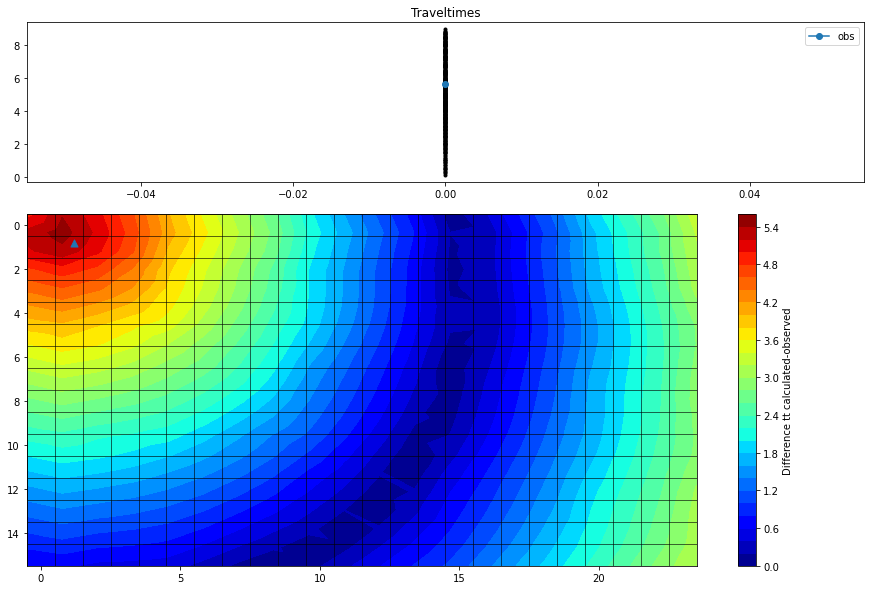

In [16]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15,10))
cmap = plt.cm.jet
gs = gridspec.GridSpec(3, 1)
plt.subplot(gs[0, :]) 
plt.title('Traveltimes')
for i in range(ttpicktrial.size):
    plt.plot(ttpicktrial[i][:],'.k')
plt.plot(obsttpicks[0],'o-',label='obs')
plt.legend()

plt.subplot(gs[1:,:]) 
plt.tricontourf(trialsource[:,0],trialsource[:,1],ttdiff,30,cmap=cmap)
cb=plt.colorbar()
cb.set_label("Difference tt calculated-observed")
plt.scatter(receivers[:,0],receivers[:,1],s=50,marker='^')
tr.plotgrid(gridpar)

name = filename.split("/")[-1].split(".")[0]
plt.savefig("figs/{}.pdf".format(name))
plt.show()

From this we can see that the discrepancies between the observed data and the simulated data are large for areas that are further away from where the most likely source position is (the areas marked in red).  On the other hand, the regions marked in blue denote areas of the model where it is more likely that the source emanated from.<br>
<br>
Change the value of `i` at the start of this notebook to see how changing the number of receiver positions improves how well we are able to constrain the source location.